In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline
from scipy.stats import boxcox

In [ ]:
data= pd.read_csv("train.csv")




In [ ]:
data.drop(columns=["Id"],inplace=True)

# **EDA (Exploratory Data Analysis)**

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [ ]:
data.describe()

,carat,depth,table,price,x,y,z
count,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000,43152.000000
mean,0.797855,61.747177,57.458347,3929.491912,5.731568,5.735018,3.538568
std,0.473594,1.435454,2.233904,3985.527795,1.121279,1.148809,0.708238
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,947.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5312.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43152 non-null  float64
 1   cut      43152 non-null  object 
 2   color    43152 non-null  object 
 3   clarity  43152 non-null  object 
 4   depth    43152 non-null  float64
 5   table    43152 non-null  float64
 6   price    43152 non-null  int64  
 7   x        43152 non-null  float64
 8   y        43152 non-null  float64
 9   z        43152 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


In [ ]:
data["cut"].unique()

array(['Ideal', 'Premium', 'Very Good', 'Fair', 'Good'], dtype=object)

In [ ]:
data["clarity"].unique()

array(['SI2', 'VVS2', 'VS2', 'IF', 'VS1', 'SI1', 'VVS1', 'I1'],
      dtype=object)

In [ ]:
data["color"].unique()

array(['I', 'G', 'F', 'H', 'D', 'E', 'J'], dtype=object)

In [ ]:
data.nunique()

carat        266
cut            5
color          7
clarity        8
depth        179
table        121
price      10640
x            546
y            543
z            368
dtype: int64

In [ ]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
data.shape

(43152, 10)

In [ ]:
data.tail(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
43147,0.52,Ideal,E,VS2,61.5,56.0,1760,5.16,5.18,3.18
43148,0.72,Very Good,D,VS2,62.1,59.0,3016,5.70,5.73,3.55
43149,0.44,Premium,I,VVS1,61.5,58.0,990,4.95,4.87,3.02
43150,0.31,Premium,E,VS1,60.2,58.0,734,4.38,4.43,2.65
43151,0.33,Ideal,G,VS2,61.2,55.0,743,4.49,4.46,2.74


array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

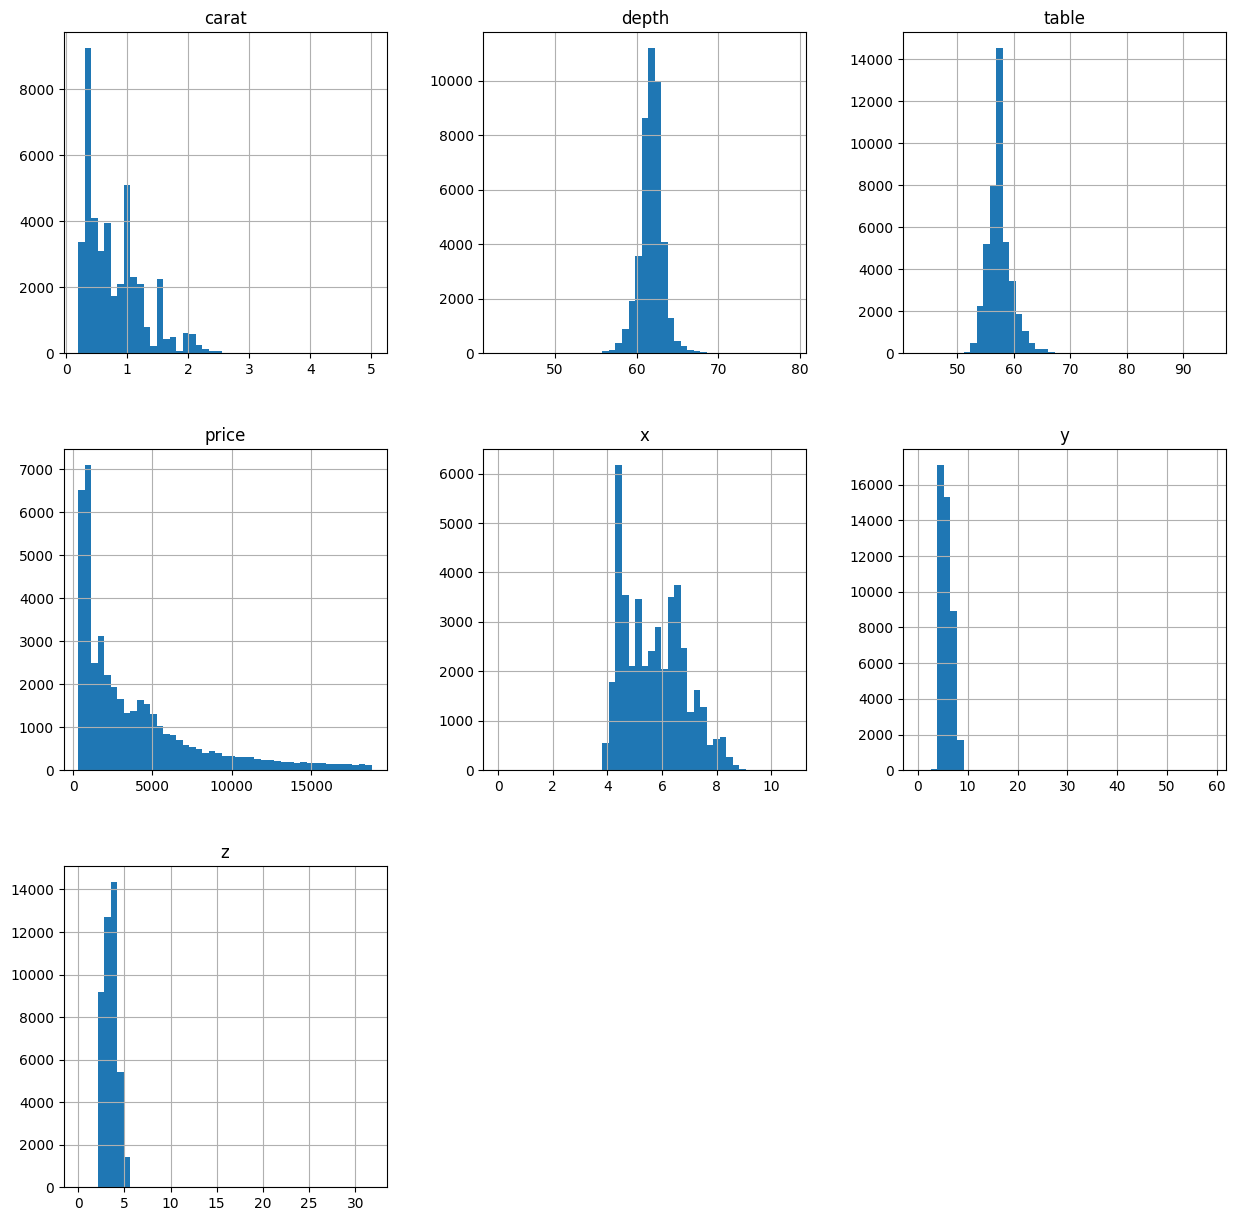

In [ ]:
data.hist(bins=45,figsize=(15, 15))

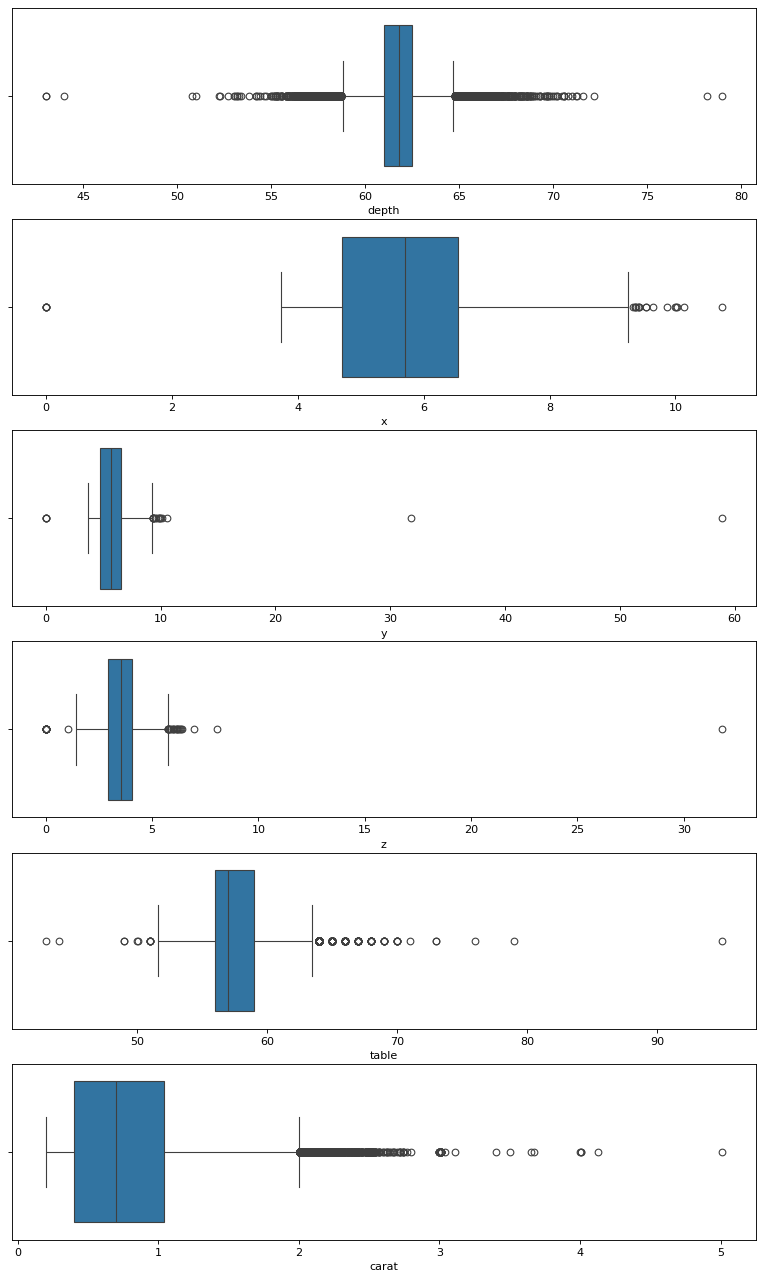

In [ ]:
fig, axis = plt.subplots(6, figsize=(12,20), dpi=80)
x = data[['depth','x','y','z','table','carat']]

for i, column in enumerate(x):
    sns.boxplot(x=data[column], ax=axis[i])

In [ ]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return lower, upper

lower_x, upper_x = lower_upper(data['x'])
lower_carat, upper_carat = lower_upper(data['carat'])
lower_y, upper_y = lower_upper(data['y'])
lower_z, upper_z = lower_upper(data['z'])
lower_table, upper_table = lower_upper(data['table'])
lower_depth, upper_depth = lower_upper(data['depth'])
lower_price, upper_price = lower_upper(data['price'])


In [ ]:
x_Outliers = np.where(data['x']>upper_x)
carat_Outliers = np.where(data['carat']>upper_carat)
y_Outliers = np.where(data['y']>upper_y)
z_Outliers = np.where(data['z']>upper_z)
table_Outliers = np.where(data['table']>upper_table)
depth_Outliers = np.where(data['depth']>upper_depth)
price_Outliers = np.where(data['price']>upper_price)

part1 = np.union1d(table_Outliers,carat_Outliers)
part2 = np.union1d(depth_Outliers,price_Outliers)
part3 = np.union1d(x_Outliers,y_Outliers)
part4 =  np.union1d(part3,z_Outliers)
part5 = np.union1d(part1,part2)
totalOutliers = np.union1d(part4,part5)
print(f"this dataset have {len(totalOutliers)} outliers\n",f"before {data.shape}")

data = data.drop(totalOutliers, axis=0)
data.reset_index(drop=True,inplace=True)
print(f"after drop outliers{data.shape}")

this dataset have 1110 outliers
 before (38979, 10)
after drop outliers(37869, 10)


##handel category data


In [ ]:
Cut_dictionary = {'Ideal':5, 'Premium':4, 'Very Good':3, 'Fair':1, 'Good':2}
Color_dictionary = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
Clarity_dictionary = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [ ]:
def encode(data):
    data =data.copy()
    data["cut"] = data["cut"].map(Cut_dictionary)
    data["color"] = data["color"].map(Color_dictionary)
    data["clarity"] = data["clarity"].map(Clarity_dictionary)
    return data

In [ ]:
data = encode(data)

In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.06,5,2,2,61.8,57.0,4270,6.57,6.60,4.07
1,0.32,5,5,4,61.3,56.0,828,4.43,4.41,2.71
2,0.53,5,4,4,61.2,56.0,1577,5.19,5.22,3.19
3,0.70,4,3,6,61.0,57.0,2596,5.76,5.72,3.50
4,0.90,3,4,8,63.1,58.0,5670,6.18,6.09,3.87


##Data Visualization

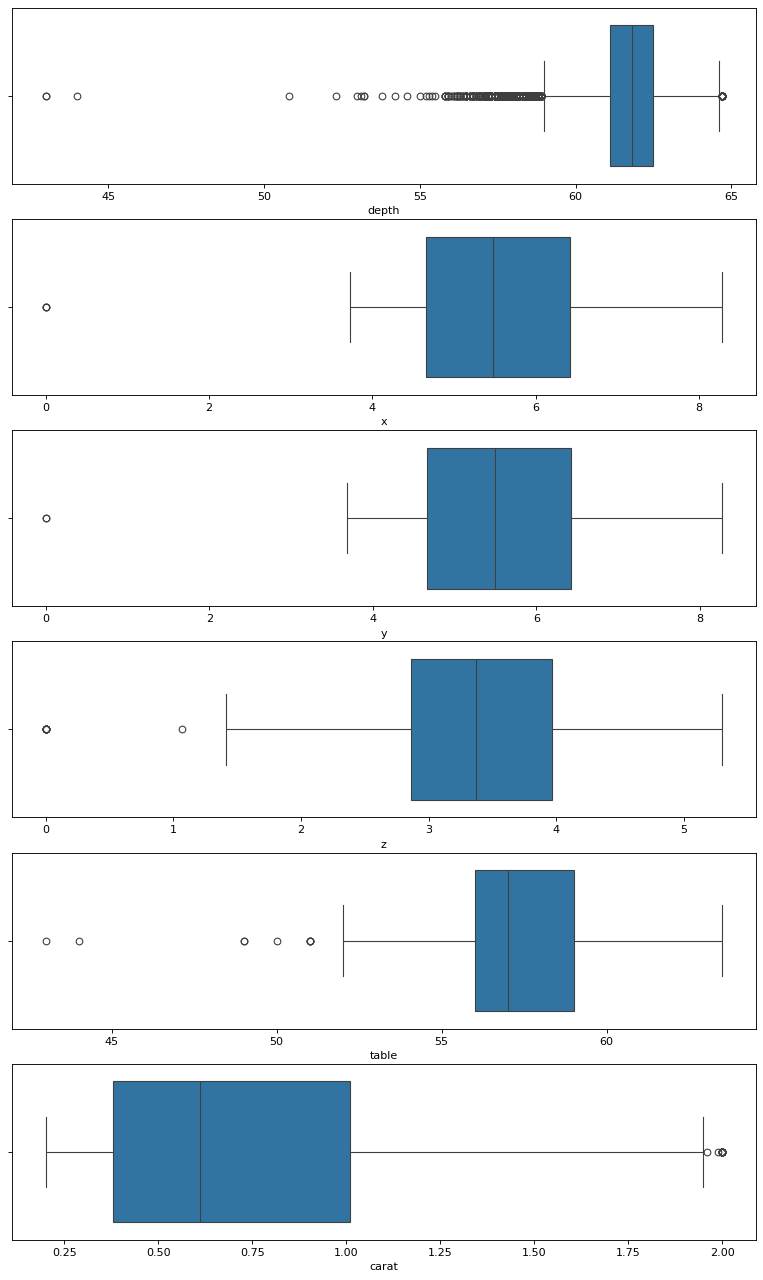

In [ ]:
fig, axis = plt.subplots(6, figsize=(12,20), dpi=80)
x = data[['depth','x','y','z','table','carat']]

for i, column in enumerate(x):
    sns.boxplot(x=data[column], ax=axis[i])

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'color'}>],
       [<Axes: title={'center': 'clarity'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

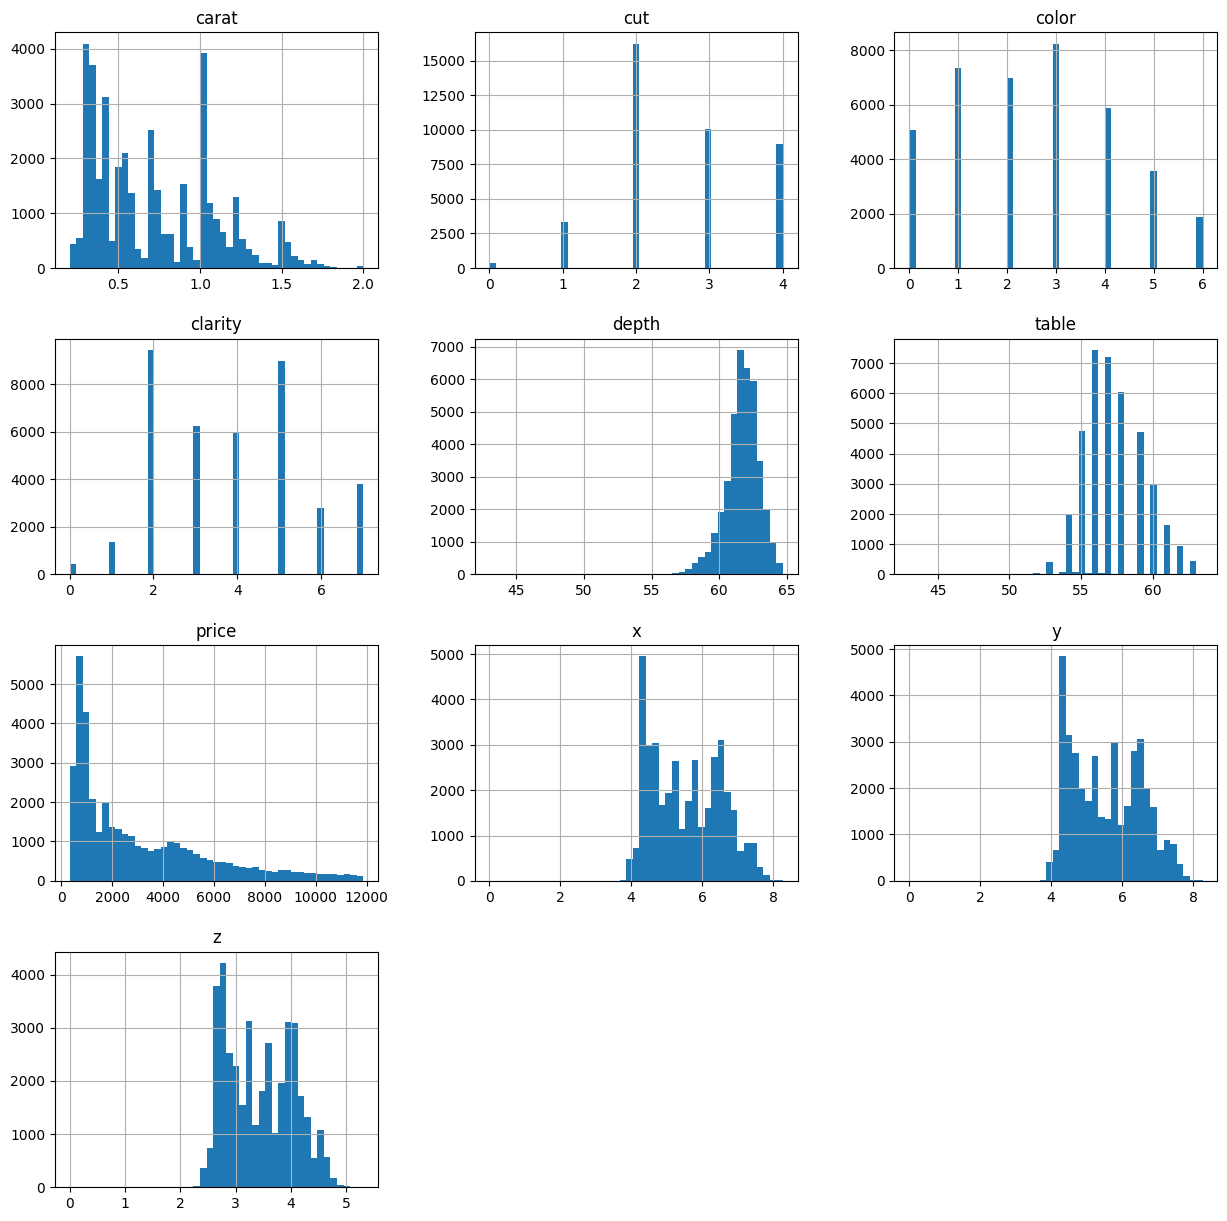

In [ ]:
data.hist(bins=45,figsize=(15, 15))

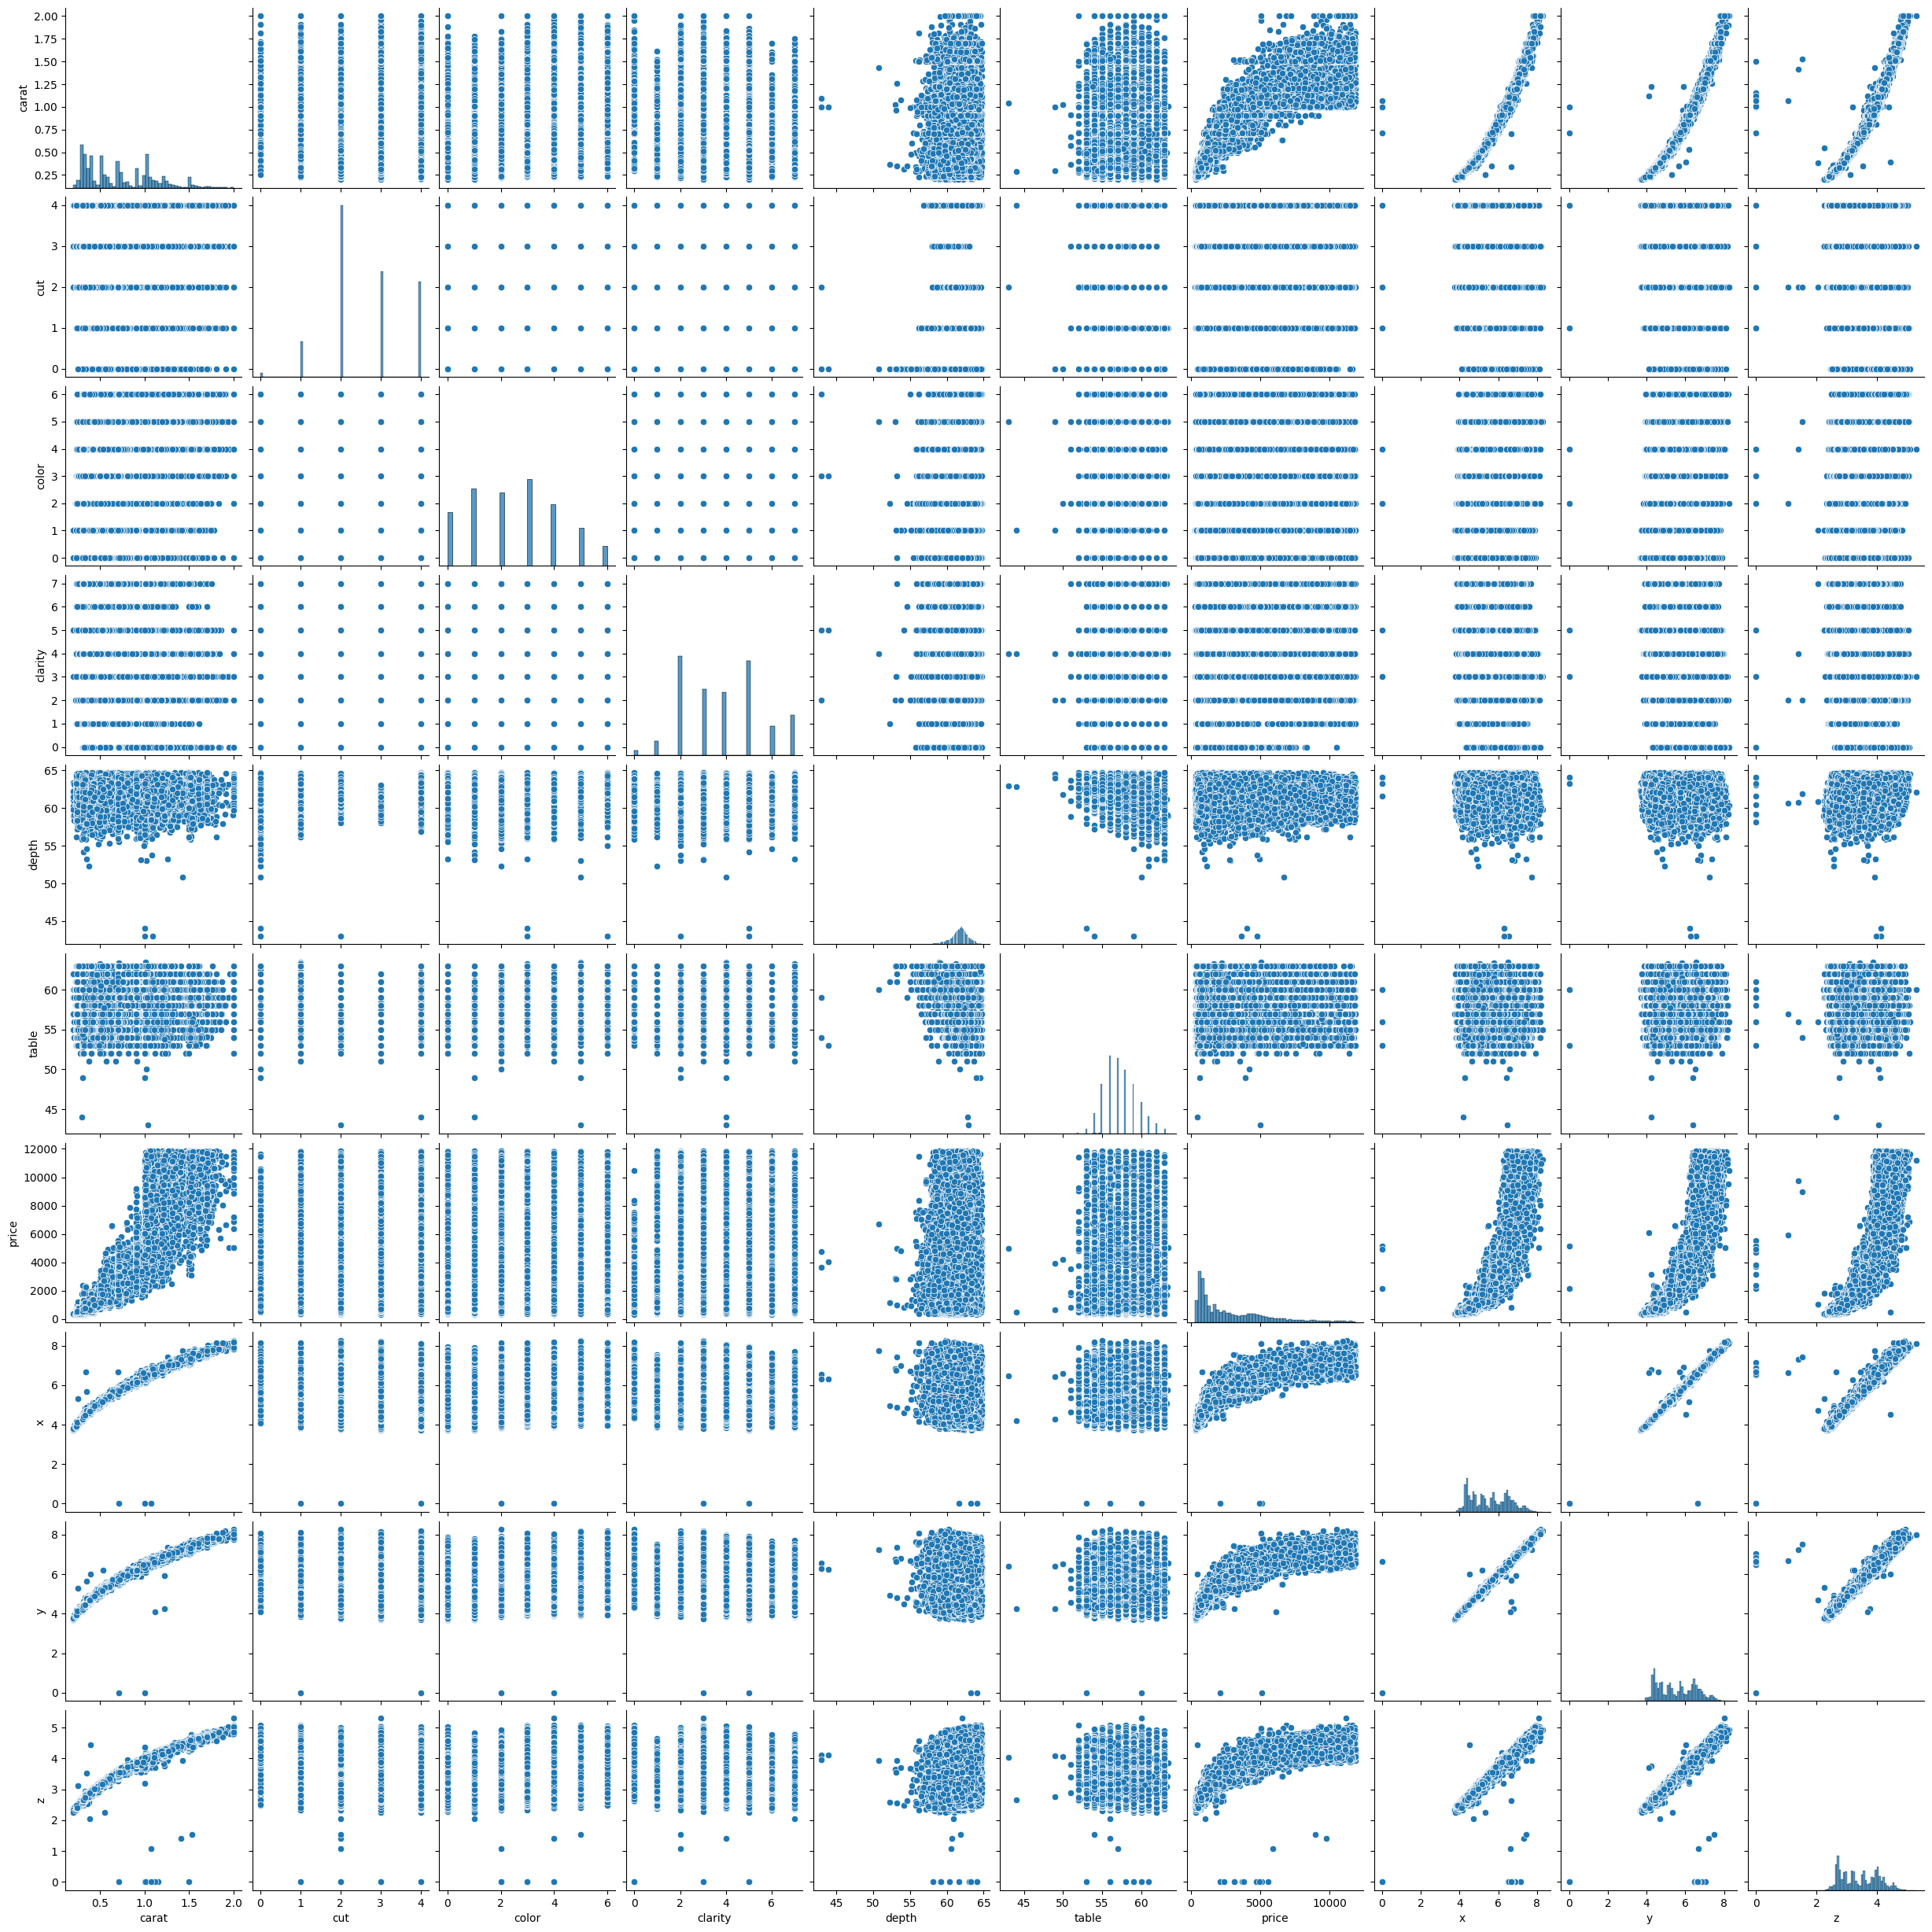

In [ ]:
sns.pairplot(data)

<Axes: xlabel='x', ylabel='z'>

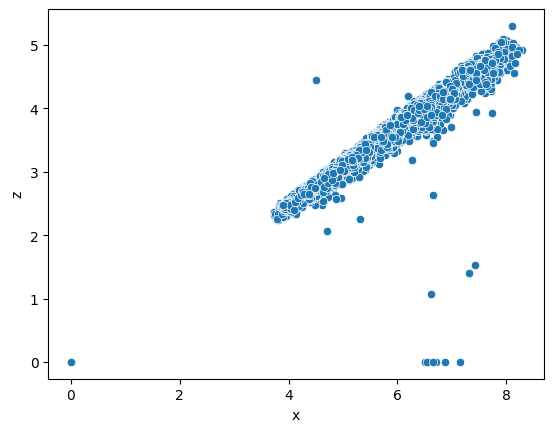

In [ ]:
sns.scatterplot(x=data['x'],y=data['z'])

In [ ]:
data.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.054491,0.256938,-0.216460,0.002487,0.189687,0.921864,0.984316,0.984166,0.978496
cut,0.054491,1.000000,0.007493,0.004035,-0.102270,0.271249,0.050271,0.052288,0.054983,0.041683
color,0.256938,0.007493,1.000000,-0.011624,0.043260,0.012961,0.140340,0.233087,0.233181,0.236760
clarity,-0.216460,0.004035,-0.011624,1.000000,-0.020423,-0.083726,-0.065162,-0.225444,-0.223062,-0.223809
depth,0.002487,-0.102270,0.043260,-0.020423,1.000000,-0.312882,-0.009682,-0.051680,-0.051728,0.067313
table,0.189687,0.271249,0.012961,-0.083726,-0.312882,1.000000,0.136172,0.195572,0.189762,0.154599
price,0.921864,0.050271,0.140340,-0.065162,-0.009682,0.136172,1.000000,0.896338,0.898269,0.891328
x,0.984316,0.052288,0.233087,-0.225444,-0.051680,0.195572,0.896338,1.000000,0.997847,0.986938
y,0.984166,0.054983,0.233181,-0.223062,-0.051728,0.189762,0.898269,0.997847,1.000000,0.986457
z,0.978496,0.041683,0.236760,-0.223809,0.067313,0.154599,0.891328,0.986938,0.986457,1.000000


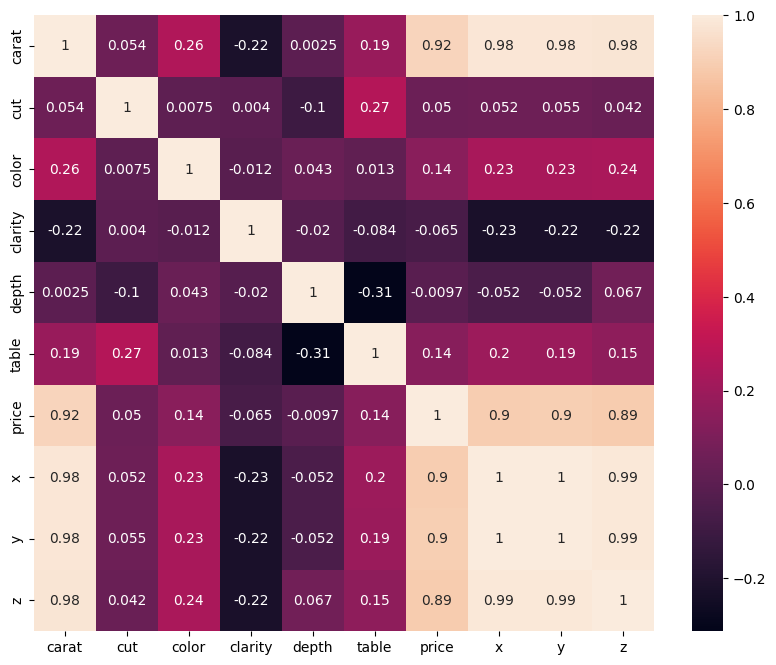

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True)
plt.show()

<Axes: xlabel='x', ylabel='price'>

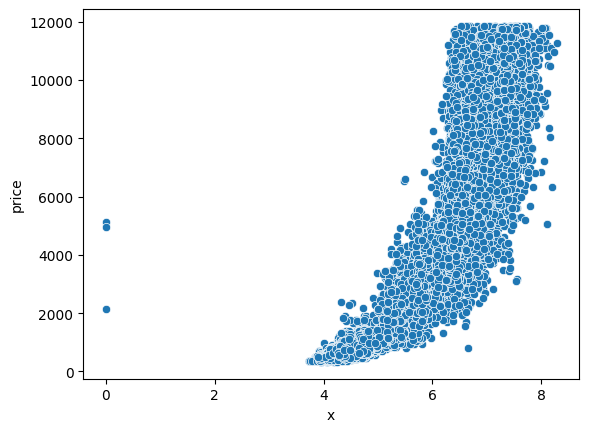

In [ ]:
sns.scatterplot(x=data['x'],y=data['price'])

<Axes: xlabel='y', ylabel='price'>

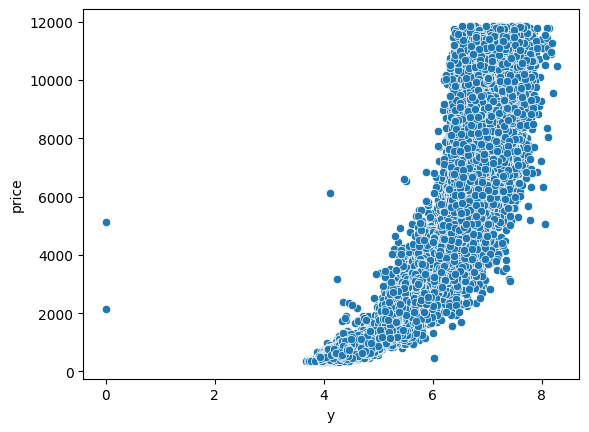

In [ ]:
sns.scatterplot(x=data['y'],y=data['price'])

<Axes: xlabel='z', ylabel='price'>

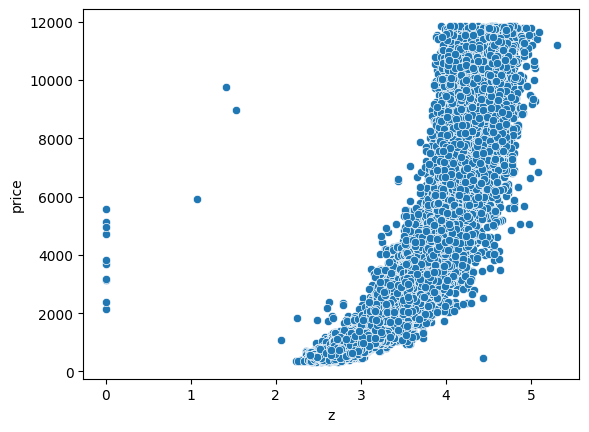

In [ ]:
sns.scatterplot(x=data['z'],y=data['price'])

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='clarity', hue='color', palette='rocket')
plt.xlabel('clarity')
plt.ylabel('Count')
plt.title('Clarity - Color')
plt.legend(title='Color')
plt.show()

<ipython-input-41-827c67fdbba0>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data["color"], palette='rocket')


<Axes: ylabel='count'>

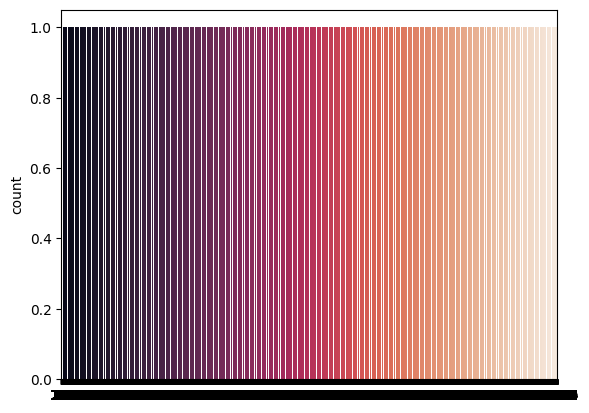

In [ ]:
sns.countplot(data["color"], palette='rocket')

In [ ]:
data["color"].value_counts()

color
0.500000    8252
0.166667    7334
0.333333    6968
0.666667    5865
0.000000    5087
0.833333    3581
1.000000    1890
Name: count, dtype: int64

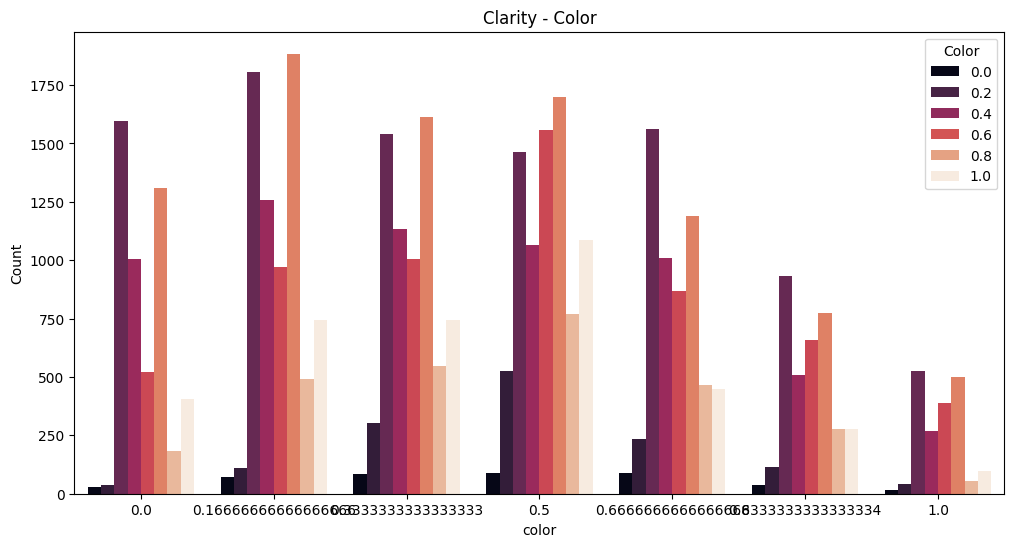

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='color', hue='clarity', palette='rocket')
plt.xlabel('color')
plt.ylabel('Count')
plt.title('Clarity - Color')
plt.legend(title='Color')
plt.show()

##scallinng $ Feature Engineer

In [ ]:
data['volume'] = data['x'] * data['y'] * data['z']

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37869 entries, 0 to 37868
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    37869 non-null  float64
 1   cut      37869 non-null  int64  
 2   color    37869 non-null  int64  
 3   clarity  37869 non-null  int64  
 4   depth    37869 non-null  float64
 5   table    37869 non-null  float64
 6   price    37869 non-null  int64  
 7   x        37869 non-null  float64
 8   y        37869 non-null  float64
 9   z        37869 non-null  float64
 10  volume   37869 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 3.2 MB


In [ ]:
x=data[['x','y','z','depth','table','carat','color','cut','clarity','volume']]
x=(x/x.max())
y= data[['price']]


In [ ]:
y

,price
0,4270
1,828
2,1577
3,2596
4,5670
...,...
37864,1760
37865,3016
37866,990
37867,734


In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,1.06,5,2,2,61.8,57.0,4270,6.57,6.60,4.07,176.483340
1,0.32,5,5,4,61.3,56.0,828,4.43,4.41,2.71,52.943373
2,0.53,5,4,4,61.2,56.0,1577,5.19,5.22,3.19,86.422842
3,0.70,4,3,6,61.0,57.0,2596,5.76,5.72,3.50,115.315200
4,0.90,3,4,8,63.1,58.0,5670,6.18,6.09,3.87,145.652094


# **Models**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

# Linear Regression model

In [ ]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the polynomial features
model.fit(x, y)


LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 466537.9074700124
R^2 Score: 0.9205609398022396


In [ ]:
print("X shape:", x_train.shape)
print("y shape:", y_train.shape)

X shape: (30295, 10)
y shape: (30295, 1)


In [ ]:
train_score = model.score(x_train, y_train)
print(f'The Accuracy of training: {round(train_score*100, 2)} %')

The Accuracy of training: 91.62 %


In [ ]:
x_train

,x,y,z,depth,table,carat,color,cut,clarity,volume
14791,0.558824,0.550548,0.551793,0.944272,0.976378,0.179487,0.428571,0.8,0.375,0.177749
18314,0.718137,0.711328,0.741036,0.984520,0.897638,0.405128,0.571429,0.4,0.375,0.396349
26285,0.802696,0.802680,0.806773,0.953560,0.897638,0.548718,0.571429,0.6,0.750,0.544260
16993,0.562500,0.562728,0.563745,0.952012,0.850394,0.184615,0.714286,1.0,0.875,0.186838
16647,0.696078,0.697929,0.709163,0.965944,0.897638,0.364103,0.857143,0.6,0.500,0.360726
...,...,...,...,...,...,...,...,...,...,...
16850,0.750000,0.751523,0.762948,0.964396,0.913386,0.461538,0.285714,0.6,0.375,0.450257
6265,0.758578,0.758831,0.756972,0.947368,0.897638,0.461538,0.571429,0.6,0.250,0.456233
11284,0.560049,0.552984,0.547809,0.934985,0.929134,0.179487,0.714286,0.8,0.500,0.177635
860,0.536765,0.532278,0.541833,0.962848,0.881890,0.164103,0.428571,1.0,0.875,0.162087


Gbooste

In [ ]:
import xgboost as xgb
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = xgb_regressor.predict(x_test)
r2 = r2_score(y_test, y_pred)
record = {"model":"xgb_regressor","R2_score":round(r2,3)}
record


{'model': 'xgb_regressor', 'R2_score': 0.983}

# Decision Tree Regressor model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
treereg=DecisionTreeRegressor()
treereg=treereg.fit(x,y)

In [ ]:
from sklearn.metrics import r2_score

# Assuming you have your test data stored in variables x_test and y_test
y_pred = treereg.predict(x_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

R-squared: 0.9999957042688573


,price
0,4270.0
1,15164.0
2,828.0
3,1577.0
4,2596.0
...,...
43147,1760.0
43148,3016.0
43149,990.0
43150,734.0


# Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train Random Forest Regressor
rf_regressor = RandomForestRegressor()
rf_regressor.fit(x_train, y_train)

# Predict on the testing set
y_pred_rf = rf_regressor.predict(x_test)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error (Random Forest):", mse_rf)

<ipython-input-44-ea7aa14747f5>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_regressor.fit(x_train, y_train)


Mean Squared Error (Random Forest): 103753.28342963313


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred_rf)

# Convert R-squared to percentage
accuracy_percentage = r2 * 100

print("Accuracy (R-squared) Percentage:", accuracy_percentage)

Accuracy (R-squared) Percentage: 98.23335613331449


##KNeighbors

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



# Step 4: Instantiate the KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed

# Step 5: Train the model
knn_reg.fit(x_train, y_train)

# Step 6: Make predictions
y_pred_n = knn_reg.predict(x_test)

# Step 7: Evaluate the model
mse = mean_squared_error(y_test, y_pred_n)
print("Mean Squared Error:", mse)




Mean Squared Error: 130980.93044098232


In [ ]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_test, y_pred_n)

# Convert R-squared to percentage
accuracy_percentage = r2 * 100

print("Accuracy (R-squared) Percentage:", accuracy_percentage)

Accuracy (R-squared) Percentage: 97.76974135403378


lasso

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize Lasso regression model
lasso_reg = Lasso(alpha=0.1)

# Fit the model to the training data
lasso_reg.fit(x_train, y_train)

# Evaluate the model
train_score = lasso_reg.score(x_train, y_train)
test_score = lasso_reg.score(x_test, y_test)

# Make predictions
y_pred = lasso_reg.predict(x_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

print("Training Score:", train_score)
print("Test Score:", test_score)
print("Mean Squared Error:", mse)


Training Score: 0.9160006169274015
Test Score: 0.9200661643444187
Mean Squared Error: 469443.6758185389


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.100e+08, tolerance: 1.812e+07
  model = cd_fast.enet_coordinate_descent(


## neural network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with single neuron for regression
])

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model1.fit(x_train, y_train, epochs=50, validation_split=0.2)

# Evaluate the model
mse = model1.evaluate(x_test, y_test)
y_pred_n = model.predict(x_test)
print("Mean Squared Error:", mse)


Epoch 1/50
758/758 [==============================] - 8s 8ms/step - loss: 8232829.0000 - val_loss: 4542239.0000
Epoch 2/50
758/758 [==============================] - 3s 3ms/step - loss: 3745105.7500 - val_loss: 2870478.0000
Epoch 3/50
758/758 [==============================] - 2s 3ms/step - loss: 1924710.0000 - val_loss: 1344870.0000
Epoch 4/50
758/758 [==============================] - 2s 3ms/step - loss: 1125483.2500 - val_loss: 1000940.0000
Epoch 5/50
758/758 [==============================] - 2s 3ms/step - loss: 870774.6250 - val_loss: 780553.7500
Epoch 6/50
758/758 [==============================] - 2s 3ms/step - loss: 691546.6875 - val_loss: 628049.8750
Epoch 7/50
758/758 [==============================] - 3s 3ms/step - loss: 569200.8125 - val_loss: 522838.6250
Epoch 8/50
758/758 [==============================] - 2s 2ms/step - loss: 487737.4688 - val_loss: 449026.4375
Epoch 9/50
758/758 [==============================] - 2s 2ms/step - loss: 427421.5000 - val_loss: 394608.9375
Ep

In [ ]:
from sklearn.metrics import r2_score

# Assuming y_test and y_pred are the true and predicted target values respectively
r2 = r2_score(y_test, y_pred_n)

# Convert R-squared to percentage
r2_percentage = r2 * 100

print("R-squared (Accuracy) Percentage:", r2_percentage)

R-squared (Accuracy) Percentage: 92.05609398022396


##prepare Test Data

In [ ]:
import pandas as pd
data_test=pd.read_csv("test.csv")


In [ ]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       10788 non-null  int64  
 1   carat    10788 non-null  float64
 2   cut      10788 non-null  object 
 3   color    10788 non-null  object 
 4   clarity  10788 non-null  object 
 5   depth    10788 non-null  float64
 6   table    10788 non-null  float64
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


In [ ]:
data_test['volume'] = data_test['x'] * data_test['y'] * data_test['z']

In [ ]:
Cut_dictionary = {'Ideal':5, 'Premium':4, 'Very Good':3, 'Fair':1, 'Good':2}
Color_dictionary = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}
Clarity_dictionary = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

In [ ]:
def encode(data):
    data =data.copy()
    data_test["cut"] = data_test["cut"].map(Cut_dictionary)
    data_test["color"] = data_test["color"].map(Color_dictionary)
    data_test["clarity"] = data_test["clarity"].map(Clarity_dictionary)
    return data

In [ ]:
test = encode(data_test)
test.head()

,Id,carat,cut,color,clarity,depth,table,x,y,z,volume
0,1,0.34,5,4,6,61.1,57.0,4.52,4.48,2.75,55.686400
1,2,0.71,4,6,4,62.7,58.0,5.74,5.68,3.58,116.719456
2,3,0.44,3,2,5,62.8,56.0,4.83,4.88,3.05,71.889720
3,4,0.81,4,6,2,60.1,59.0,6.09,6.03,3.65,134.037855
4,5,0.40,5,4,7,61.2,56.0,4.74,4.80,2.92,66.435840


In [ ]:
X_test = test[['x','y','z','depth','table','carat','color','cut','clarity','volume']]

In [ ]:
X_test = (X_test/X_test.max())

In [ ]:
X_test.head()

,x,y,z,depth,table,carat,color,cut,clarity,volume
0,0.441838,0.440945,0.409226,0.773418,0.780822,0.075556,0.571429,1.0,0.750,0.079728
1,0.561095,0.559055,0.532738,0.793671,0.794521,0.157778,0.857143,0.8,0.500,0.167111
2,0.472141,0.480315,0.453869,0.794937,0.767123,0.097778,0.285714,0.6,0.625,0.102927
3,0.595308,0.593504,0.543155,0.760759,0.808219,0.180000,0.857143,0.8,0.250,0.191906
4,0.463343,0.472441,0.434524,0.774684,0.767123,0.088889,0.571429,1.0,0.875,0.095118


##predict test data model

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        10788 non-null  float64
 1   y        10788 non-null  float64
 2   z        10788 non-null  float64
 3   depth    10788 non-null  float64
 4   table    10788 non-null  float64
 5   carat    10788 non-null  float64
 6   color    10788 non-null  float64
 7   cut      10788 non-null  float64
 8   clarity  10788 non-null  float64
 9   volume   10788 non-null  float64
dtypes: float64(10)
memory usage: 842.9 KB


In [ ]:
predictions = xgb_regressor.predict(X_test)
predictions = predictions.flatten()
# Now you have the predicted prices


In [ ]:
sub = pd.DataFrame({
    'Id': data_test['Id'],
    'price': predictions
})


In [ ]:
sub

,Id,price
0,1,945.840210
1,2,1093.092407
2,3,1068.042358
3,4,989.574707
4,5,916.127014
...,...,...
10783,10784,881.496277
10784,10785,1296.286255
10785,10786,1179.157349
10786,10787,1270.898071


In [ ]:
sub.to_csv('final_result.csv', index=False)

In [ ]:
from google.colab import files

files.download('final_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>